### Keras Tensorflow tutorial: Practical guide from getting started to developing complex deep neural network
http://cv-tricks.com/tensorflow-tutorial/keras

 edit "~/.keras/keras.json" to switch  between tensorflow or theano as backends

Keras has two distinct ways of building models
1. Sequential model: This is used to implement simple models. You simply keep adding layers to the existing model
2. Functional API: To build more complex models using it, models with multiple output, directed acyclic graph etc.

In [3]:
# start by importing and building a Sequential model.

from keras.models import Sequential
model = Sequential()

In [4]:
# add layers like Dense(fully connected layer), Activation, Conv2D, MaxPooling2D etc 
# by calling add function.

from keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)))
# This adds a Convolutional layer with 64 filters of size 3 * 3 to the graph

#### Specify the optimization process

In [5]:
# use the ‘rmsprop’ optimizer to change weights in such a way that the loss 
# binary_crossentropy’ is minimized at each iteration

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop')

In [10]:
# If you want to specify stochastic gradient descent and you want to choose proper 
# initialization and other hyperparameters:

from keras.optimizers import SGD


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [9]:
# feed the data to the model via the fit function

model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

In [ ]:
# use the evaluate function to test the model

score = model.evaluate(x_test, y_test, batch_size=32)

### Solve a linear regression problem with an example
For this example, we will create 100 data points and try to fit them into a line.
TrainX has values between –1 and 1, and TrainY has 3 times the TrainX and some randomness

In [6]:
# create training data

import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
 
trX = np.linspace(-1, 1, 101)
trY = 3 * trX + np.random.randn(*trX.shape) * 0.33

In [7]:
# create model

model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform', activation='linear'))

/root/anaconda3/envs/tf1.1_gpu/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", input_dim=1, units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [8]:
weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weights w: %.2f, b: %.2f' % (w_init, b_init)) 
## Linear regression model is initialized with weight w: -0.01, b: 0.00


Linear regression model is initialized with weights w: 0.02, b: 0.00


In [9]:
# train this linear model with our training data of trX and trY,

model.compile(optimizer='sgd', loss='mse')

In [10]:
# feed the data using fit function

model.fit(trX, trY, nb_epoch=200, verbose=1)

/root/anaconda3/envs/tf1.1_gpu/lib/python3.5/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/200
101/101 [==============================] - 0s - loss: 3.2189     
Epoch 2/200
101/101 [==============================] - 0s - loss: 3.0469     
Epoch 3/200
101/101 [==============================] - 0s - loss: 2.8702     
Epoch 4/200
101/101 [==============================] - 0s - loss: 2.7191     
Epoch 5/200
101/101 [==============================] - 0s - loss: 2.5617     
Epoch 6/200
101/101 [==============================] - 0s - loss: 2.4239     
Epoch 7/200
101/101 [==============================] - 0s - loss: 2.2941     
Epoch 8/200
101/101 [==============================] - 0s - loss: 2.1832     
Epoch 9/200
101/101 [==============================] - 0s - loss: 2.0672     
Epoch 10/200
101/101 [==============================] - 0s - loss: 1.9609     
Epoch 11/200
101/101 [==============================] - 0s - loss: 1.8562     
Epoch 12/200
101/101 [==============================] - 0s - loss: 1.7678     
Epoch 13/200
101/101 [==============================] - 0s - 

101/101 [==============================] - 0s - loss: 0.1036     
Epoch 105/200
101/101 [==============================] - 0s - loss: 0.1030     
Epoch 106/200
101/101 [==============================] - 0s - loss: 0.1027     
Epoch 107/200
101/101 [==============================] - 0s - loss: 0.1020     
Epoch 108/200
101/101 [==============================] - 0s - loss: 0.1017     
Epoch 109/200
101/101 [==============================] - 0s - loss: 0.1013     
Epoch 110/200
101/101 [==============================] - 0s - loss: 0.1009     
Epoch 111/200
101/101 [==============================] - 0s - loss: 0.1005     
Epoch 112/200
101/101 [==============================] - 0s - loss: 0.1003     
Epoch 113/200
101/101 [==============================] - 0s - loss: 0.1000     
Epoch 114/200
101/101 [==============================] - 0s - loss: 0.0998     
Epoch 115/200
101/101 [==============================] - 0s - loss: 0.0996     
Epoch 116/200
101/101 [==============================]

In [46]:
# print the weight after training

weights = model.layers[0].get_weights()
w_final = weights[0][0][0]
b_final = weights[1][0]
print('Linear regression model is trained to have weight w: %.2f, b: %.2f' % (w_final, b_final))
     
##Linear regression model is trained to have weight w: 2.94, b: 0.08

Linear regression model is trained to have weight w: 3.00, b: -0.04


In [47]:
print(weights)
print(type(weights))
print(len(weights))
print(weights[0])
print(weights[0].shape)
print(weights[0][0])
print(type(weights[0][0]))
print(weights[0][0][0])
print(type(weights[0][0][0]))

[array([[ 3.00326824]], dtype=float32), array([-0.0362544], dtype=float32)]
<class 'list'>
2
[[ 3.00326824]]
(1, 1)
[ 3.00326824]
<class 'numpy.ndarray'>
3.00327
<class 'numpy.float32'>


### Saving and restoring pre-trained weights using Keras
Once you are done with training using Keras, you can save your network weights in HDF5 binary data format. (Require: h5py package installed)

In [48]:
# Saving weights:

model.save_weights("my_model.h5")

In [32]:
# Restoring pre-trained weights:

model.load_weights('my_model.h5')

### Saving and restoring network structure

In [49]:
# save as JSON into a network file

json_string = model.to_json()

import json
with open('my_network.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [50]:
type(json_string)

str

In [54]:
# restore from json str

from keras.models import model_from_json

model2 = model_from_json(json_string)

In [55]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Functional API:
used for building complex model. Functional API allows you to call models like a function as we do for a layer

In [33]:
# Previous Sequential example: from keras.models import Sequential
from keras.models import Model

In [51]:
# specifying the input, as opposed to (previous) mentioning the input at the end of 
# the fit function as done in Sequential models

from keras.layers import Input
# First, define the vision modules

# declare a tensor of shape 1 * 28 * 28 by using Input(), not including the batch size.
digit_input = Input(shape=(28,28,1,))

In [52]:
# apply a convolutional layer using the Functional API, we shall have to 
# specify the variable on which we want to apply the layer

x = Conv2D(64, (3, 3))(digit_input)
x = Conv2D(64, (3, 3))(x)
x = MaxPooling2D((2, 2))(x)
out = Flatten()(x)

In [58]:
# Finally,  create a model by specifying the input and output

vision_model = Model(digit_input, out)

In [60]:
# If you want to specify stochastic gradient descent and you want to choose proper 
# initialization and other hyperparameters:

from keras.optimizers import SGD


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
vision_model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [61]:
# feed the data to the model via the fit function

vision_model.fit(batch_size=32, epochs=10)

AttributeError: 'NoneType' object has no attribute 'shape'

In [62]:
??vision_model.fit

### Develop VGG convolutional neural network using functional API
vgg-16 has 16 layers. As you can see that it takes an input of 224 * 224 * 3

![title](img/vgg16.png)

In [35]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout
import numpy as np

input_shape = (224,224,3)
classes = 1000

img_input = Input(shape=input_shape)
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

x = Flatten(name='flatten')(x)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(classes, activation='softmax', name='predictions')(x)

In [38]:
img_input.shape

(1, 224, 224, 3)

In [40]:
??Model

In [37]:
#vgg_model = Model(img_input, x)
img = image.load_img('./img/cat.jpg', target_size=(224, 224))
img_input = image.img_to_array(img)
img_input = np.expand_dims(img_input, axis=0)
vgg_model = Model(inputs=img_input, outputs=x)

TypeError: unhashable type: 'numpy.ndarray'

In [68]:
model = applications.VGG16(weights='imagenet')
img = image.load_img('cat.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
for results in decode_predictions(preds):
    for result in results:
        print('Probability %0.2f%% => [%s]' % (100*result[2], result[1]))

NameError: name 'applications' is not defined

### LeNet 5 for mnist dataset
keras_LeNet.py

60000 train samples
10000 test samples
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 54s - loss: 0.1822 - acc: 0.9441 - val_loss: 0.0630 - val_acc: 0.9796
Epoch 2/20
48000/48000 [==============================] - 53s - loss: 0.0518 - acc: 0.9844 - val_loss: 0.0495 - val_acc: 0.9847
Epoch 3/20
48000/48000 [==============================] - 53s - loss: 0.0341 - acc: 0.9898 - val_loss: 0.0417 - val_acc: 0.9869
Epoch 4/20
48000/48000 [==============================] - 51s - loss: 0.0237 - acc: 0.9925 - val_loss: 0.0442 - val_acc: 0.9858
Epoch 5/20
48000/48000 [==============================] - 49s - loss: 0.0182 - acc: 0.9939 - val_loss: 0.0346 - val_acc: 0.9892
Epoch 6/20
48000/48000 [==============================] - 49s - loss: 0.0123 - acc: 0.9957 - val_loss: 0.0334 - val_acc: 0.9896
Epoch 7/20
48000/48000 [==============================] - 49s - loss: 0.0100 - acc: 0.9967 - val_loss: 0.0369 - val_acc: 0.9891
Epoch 8/20
4800

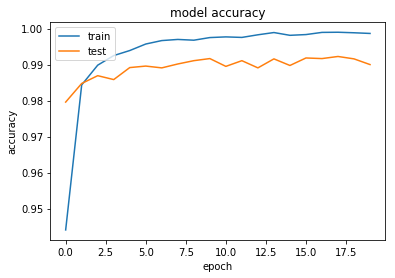

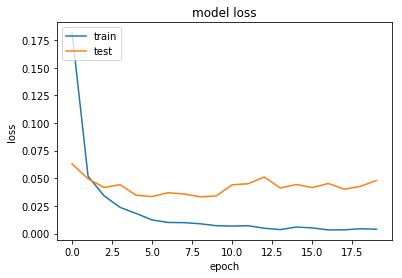

In [5]:
# import the necessary packages
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

#define the convnet 
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
		# CONV => RELU => POOL
		model.add(Conv2D(20, kernel_size=5, padding="same",
			input_shape=input_shape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=5, padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))
 
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
#INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
# using tensorboard

#tbCallBack = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#K.set_image_dim_ordering("th")
K.set_image_dim_ordering("tf")

# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
#X_train = X_train[:, np.newaxis, :, :]
#X_test = X_test[:, np.newaxis, :, :]
X_train = X_train[:,:, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])

history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
        verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
        # use tensorboard
		#verbose=VERBOSE, validation_split=VALIDATION_SPLIT, callbacks=[tbCallBack])

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation

### use Functional API

In [ ]:
# import the necessary packages
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np

import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation
from keras.models import Model

np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
#INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)


#define the convnet 

inputs = Input(shape=INPUT_SHAPE)
x = Conv2D(20, kernel_size=5, padding="same", activation='relu')(inputs)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)
x = Conv2D(20, kernel_size=5, padding="same", activation='relu')(inputs)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)
x = Flatten()(x)
x = Dense(500, activation='relu')(x)
outputs = Dense(NB_CLASSES, activation='softmax')(x)



#tbCallBack = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#K.set_image_dim_ordering("th")
K.set_image_dim_ordering("tf")

# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
#X_train = X_train[:, np.newaxis, :, :]
#X_test = X_test[:, np.newaxis, :, :]
X_train = X_train[:,:, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

                         
# use Functional API                         
                         
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=OPTIMIZER,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
        verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
                         
                         
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

60000 train samples
10000 test samples
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 34s - loss: 0.1928 - acc: 0.9443 - val_loss: 0.0710 - val_acc: 0.9789
Epoch 2/20
48000/48000 [==============================] - 35s - loss: 0.0581 - acc: 0.9817 - val_loss: 0.0518 - val_acc: 0.9846
Epoch 3/20
48000/48000 [==============================] - 33s - loss: 0.0352 - acc: 0.9898 - val_loss: 0.0469 - val_acc: 0.9851
Epoch 4/20
48000/48000 [==============================] - 32s - loss: 0.0237 - acc: 0.9925 - val_loss: 0.0518 - val_acc: 0.9853
Epoch 5/20
48000/48000 [==============================] - 33s - loss: 0.0174 - acc: 0.9946 - val_loss: 0.0445 - val_acc: 0.9876
Epoch 6/20
48000/48000 [==============================] - 35s - loss: 0.0112 - acc: 0.9965 - val_loss: 0.0469 - val_acc: 0.9874
Epoch 7/20
48000/48000 [==============================] - 33s - loss: 0.0079 - acc: 0.9975 - val_loss: 0.0567 - val_acc: 0.9849
Epoch 8/20
4800

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28, 1)

official examples: examples/cifar10_cnn.py
https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py

In [71]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
GPU run command with Theano backend (with TensorFlow, the GPU is automatically used):
    THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatx=float32 python cifar10_cnn.py
It gets down to 0.65 test logloss in 25 epochs, and down to 0.55 after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 32
num_classes = 10
epochs = 200
data_augmentation = True

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test))

x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/200
1562/1562 [==============================] - 47s - loss: 1.8419 - acc: 0.3180 - val_loss: 1.5603 - val_acc: 0.4321
Epoch 2/200
1562/1562 [==============================] - 47s - loss: 1.5521 - acc: 0.4323 - val_loss: 1.4359 - val_acc: 0.4862
Epoch 3/200
1562/1562 [==============================] - 47s - loss: 1.4261 - acc: 0.4849 - val_loss: 1.2871 - val_acc: 0.5477
Epoch 4/200
1562/1562 [==============================] - 47s - loss: 1.3418 - acc: 0.5212 - val_loss: 1.1639 - val_acc: 0.5897
Epoch 5/200
1562/1562 [==============================] - 47s - loss: 1.2736 - acc: 0.5461 - val_loss: 1.0935 - val_acc: 0.6148
Epoch 6/200
1562/1562 [==============================] - 47s - loss: 1.2144 - acc: 0.5679 - val_loss: 1.0700 - val_acc: 0.6231
Epoch 7/200
1562/1562 [==============================] - 48s - loss: 1.1663 - acc: 0.5884 - val_loss: 1.0217 - val_acc: 0.6412
Epo

1562/1562 [==============================] - 45s - loss: 0.8690 - acc: 0.7176 - val_loss: 0.7765 - val_acc: 0.7381
Epoch 128/200
1562/1562 [==============================] - 45s - loss: 0.8658 - acc: 0.7199 - val_loss: 0.8354 - val_acc: 0.7250
Epoch 129/200
1562/1562 [==============================] - 45s - loss: 0.8752 - acc: 0.7165 - val_loss: 0.7916 - val_acc: 0.7470
Epoch 130/200
1562/1562 [==============================] - 45s - loss: 0.8694 - acc: 0.7189 - val_loss: 0.7194 - val_acc: 0.7773
Epoch 131/200
1562/1562 [==============================] - 45s - loss: 0.8883 - acc: 0.7129 - val_loss: 0.8238 - val_acc: 0.7386
Epoch 132/200
1562/1562 [==============================] - 45s - loss: 0.8852 - acc: 0.7142 - val_loss: 0.8320 - val_acc: 0.7486
Epoch 133/200
1562/1562 [==============================] - 45s - loss: 0.8962 - acc: 0.7105 - val_loss: 0.7942 - val_acc: 0.7646
Epoch 134/200
1562/1562 [==============================] - 45s - loss: 0.8993 - acc: 0.7110 - val_loss: 0.7570 

### Lenet for  CIFAR10
keras_CIFAR10_simple.py

In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

import matplotlib.pyplot as plt

#from quiver_engine import server
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()


#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
 
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_CHANNELS, IMG_ROWS, IMG_COLS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])
 
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
	epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE)
 
print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

#server.launch(model)


#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 3, 32, 32)         9248      
_________________________________________________________________
activation_4 (Activation)    (None, 3, 32, 32)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 16, 32)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 16, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
act

ValueError: Error when checking input: expected conv2d_5_input to have shape (None, 3, 32, 32) but got array with shape (50000, 32, 32, 3)

In [59]:
model = None

### deeper cnn for CIFAR10
keras_CIFAR10_V1.py

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

from keras.preprocessing.image import ImageDataGenerator

#from quiver_engine import server

import matplotlib.pyplot as plt

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()


#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
 
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network

model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same',
                        input_shape=(IMG_CHANNELS, IMG_ROWS, IMG_COLS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])

#keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# train
 
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
	epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE)

#model.fit_generator(datagen.flow(X_train, Y_train,
#                        batch_size=BATCH_SIZE),
#                        samples_per_epoch=X_train.shape[0],
#                        nb_epoch=NB_EPOCH, 
#                        verbose=VERBOSE)

#server.launch(model)


print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Using TensorFlow backend.


X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


/root/anaconda3/envs/tf1.1_gpu/lib/python3.5/site-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_4/convolution' (op: 'Conv2D') with input shapes: [?,1,16,64], [3,3,64,64].

### Using TensorBoard by Keras callback

### Use saved network and weights to predicting with CIFAR-10
keras_EvaluateCIFAR10.py

In [ ]:
import numpy as np
import scipy.misc
from keras.models import model_from_json
from keras.optimizers import SGD

#load model
model_architecture = 'cifar10_architecture.json'
model_weights = 'cifar10_weights.h5'
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

#load images
img_names = ['cat2.jpg', 'dog.jpg']
imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread(img_name), (32, 32)),
                     (1, 0, 2)).astype('float32')
           for img_name in img_names]
imgs = np.array(imgs) / 255

# train
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim,
	metrics=['accuracy'])
 
predictions = model.predict_classes(imgs)
print(predictions)

### VGG 16 (caffe) converted into Keras version
https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3

In [83]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

# define a VGG16 network

def VGG_16(weights_path=None):
    model = Sequential()
    #model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())

    #top layer of the VGG net
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

if __name__ == "__main__":
    im = cv2.resize(cv2.imread('./img/cat.jpg'), (224, 224)).astype(np.float32)
    #im = im.transpose((2,0,1))
    #im = np.expand_dims(im, axis=0)
    K.set_image_dim_ordering("tf")

    # Test pretrained model
    model = VGG_16('./vgg16_weights.h5')
    optimizer = SGD()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy')
    out = model.predict(im)
    print(np.argmax(out))

KeyError: "Can't open attribute (Can't locate attribute: 'layer_names')"

In [77]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

if __name__ == "__main__":
    im = cv2.resize(cv2.imread('cat.jpg'), (224, 224)).astype(np.float32)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)

    # Test pretrained model
    model = VGG_16('./vgg16_weights.h5')
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy')
    out = model.predict(im)
    print(np.argmax(out))

error: /io/opencv/modules/imgproc/src/imgwarp.cpp:3492: error: (-215) ssize.width > 0 && ssize.height > 0 in function resize


In [80]:
# -*- coding: utf-8 -*-
'''VGG16 model for Keras.

# Reference:

- [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)

'''
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import _obtain_input_shape
from keras.engine.topology import get_source_inputs


WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'


def VGG16(include_top=True, weights='imagenet',
          input_tensor=None, input_shape=None,
          pooling=None,
          classes=1000):
    """Instantiates the VGG16 architecture.

    Optionally loads weights pre-trained
    on ImageNet. Note that when using TensorFlow,
    for best performance you should set
    `image_data_format="channels_last"` in your Keras config
    at ~/.keras/keras.json.

    The model and the weights are compatible with both
    TensorFlow and Theano. The data format
    convention used by the model is the one
    specified in your Keras config file.

    # Arguments
        include_top: whether to include the 3 fully-connected
            layers at the top of the network.
        weights: one of `None` (random initialization)
            or "imagenet" (pre-training on ImageNet).
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is False (otherwise the input shape
            has to be `(224, 224, 3)` (with `channels_last` data format)
            or `(3, 224, 244)` (with `channels_first` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 48.
            E.g. `(200, 200, 3)` would be one valid value.
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional layer.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is True, and
            if no `weights` argument is specified.

    # Returns
        A Keras model instance.

    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
    """
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')
    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                      include_top=include_top)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    if include_top:
        # Classification block
        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='vgg16')

    # load weights
    if weights == 'imagenet':
        if include_top:
            weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models')
        else:
            weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models')
        model.load_weights(weights_path)
        if K.backend() == 'theano':
            layer_utils.convert_all_kernels_in_model(model)

        if K.image_data_format() == 'channels_first':
            if include_top:
                maxpool = model.get_layer(name='block5_pool')
                shape = maxpool.output_shape[1:]
                dense = model.get_layer(name='fc1')
                layer_utils.convert_dense_weights_data_format(dense, shape, 'channels_first')

            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
    return model


if __name__ == '__main__':
    model = VGG16(include_top=True, weights='imagenet')

    img_path = 'elephant.jpg'
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print('Input image shape:', x.shape)

    preds = model.predict(x)
    print('Predicted:', decode_predictions(preds))

ValueError: Dimension 1 in both shapes must be equal, but are 3 and 64 for 'Assign_90' (op: 'Assign') with input shapes: [3,3,3,64], [3,64,3,3].

### Keras Application
https://keras.io/applications/

deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.
The downloaded models are saved in '/root/.keras/models'

In [16]:
# Classify ImageNet classes with ResNet50

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# will download "resnet50_weights_tf_dim_ordering_tf_kernels.h5" &
#               "resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"
model = ResNet50(weights='imagenet')

img_path = './img/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), 
# (u'n02504458', u'African_elephant', 0.061040461)]

Predicted: [('n02504458', 'African_elephant', 0.84721768), ('n01871265', 'tusker', 0.088068262), ('n02504013', 'Indian_elephant', 0.064712435)]


In [29]:
model = ResNet50(weights='imagenet')
# show ResNet50 model summary
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_8 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D) (None, 230, 230, 3)   0           input_8[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        zero_padding2d_3[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

In [15]:
# Extract features with VGG16

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = './img/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.84721756), ('n01871265', 'tusker', 0.088068247), ('n02504013', 'Indian_elephant', 0.064712428)]


In [17]:
preds.shape, type(preds)

((1, 1000), numpy.ndarray)

In [18]:
de_preds = decode_predictions(preds)

In [20]:
len(de_preds), type(de_preds)

(1, list)

In [24]:
de_preds[0]

[('n02504458', 'African_elephant', 0.84721768),
 ('n01871265', 'tusker', 0.088068262),
 ('n02504013', 'Indian_elephant', 0.064712435),
 ('n01704323', 'triceratops', 3.3450198e-07),
 ('n02422106', 'hartebeest', 3.0630827e-07)]

In [25]:
# Extract features from an arbitrary intermediate layer with VGG19

from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = './img/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

In [28]:
# show vgg model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [27]:
type(block4_pool_features), block4_pool_features.shape

(numpy.ndarray, (1, 14, 14, 512))

In [ ]:
# Fine-tune InceptionV3 on a new set of classes

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
# use functional API manner
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit_generator(...)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 172 layers and unfreeze the rest:
for layer in model.layers[:172]:
   layer.trainable = False
for layer in model.layers[172:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit_generator(...)

In [39]:
# Build InceptionV3 over a custom input tensor

from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input

# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(224, 224, 3))  # this assumes K.image_data_format() == 'channels_last'

model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)